In [10]:
import pandas as pd


In [12]:
df = pd.read_csv('./data_055.csv', encoding="cp949")


In [32]:
# 전체 금액 대비 숙박비
FOOD = ["B35", "B36", "B37", "B38", "B39", "B40", "B41", "B42"]
HOTEL = ["B1", "B2", "B3", "B4", "B5", "B6"]
LEISURE = ["B97", "B98", "B101", "B102", "B103", "B104"]
TOTAL = ["B"+str(i) for i in range(1, 167)]

df["외식비"] = df[FOOD].sum(axis=1)
df["숙박비"] = df[HOTEL].sum(axis=1)
df["취미"] = df[LEISURE].sum(axis=1)
df["총가계지출"] = df[TOTAL].sum(axis=1)
df



,P1,P2,P3,P4,P5,P6,P7,B1,B2,B3,...,E1,E2,E3,E4,E5,E6,외식비,숙박비,취미,총가계지출
0,M,20대_후,1,1,0,0,A은행,0,0,0,...,0,0,11111111110,0,111111111111,1100000000,1173000,190000,0,4090000
1,M,50대_후,1,0,0,0,A은행,0,0,0,...,0,0,0,0,111110111111,10000000000,188000,0,0,500000
2,M,40대_후,1,1,0,0,A은행,0,0,0,...,0,1101101111,0,0,111101101111,101101101111,110000,0,0,1750000
3,F,60대_초,1,1,0,0,A은행,0,0,0,...,0,0,0,0,111111111111,111111111111,14000,0,0,43001000
4,M,30대_후,0,1,0,0,B은행,0,0,0,...,0,111111111111,0,0,111111111111,111111111111,0,0,0,4911000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473225,F,40대_초,0,1,0,1,B은행,0,0,0,...,111111111111,10001001100,0,0,111111111101,10111111100,6000,0,0,575000
473226,M,20대_후,1,1,0,0,A은행,0,0,0,...,0,110110000000,0,0,111111111110,111111111000,126000,0,0,796000
473227,F,40대_후,1,1,1,0,B은행,0,0,0,...,0,100100011,0,0,111111111111,111111111111,244000,0,0,1322000
473228,M,60대_후,1,1,1,0,A은행,0,0,0,...,0,100101000,0,0,111111111111,110101111111,189000,0,0,1122000


In [30]:
cnt = len(df[(df["P2"] == "20대_초") | (df["P2"] == "20대_후")])
print(cnt)


48387


In [36]:
import matplotlib.pyplot as plt
import numpy as np
import platform  # pyplot 한글 깨짐 문제
    
# 조건 행 추출, num 나이 앞 자리수


def col_by_age(num):
    temp_df = df[(df['Age'] == num * 10) | (df['Age'] == num * 10 + 9)]

    return temp_df

# ratio, label 구하기
# 각 사람에 대해서 비율을 구하자

def get_ratio(df, age):
    # get_ratio
    gen_df = df[(df["P2"] == str(age) + "대_초") | (df["P2"] == str(age) + "대_후")]
    cnt = len(gen_df)
    food = gen_df["외식비"].sum() / cnt
    hotel = gen_df["숙박비"].sum() / cnt
    leisure = gen_df["취미"].sum() / cnt
    # 교양 오락비와 식료품비에서 차지하는 비율
    total = gen_df["총가계지출"].sum() / cnt  

    food_ratio = food / total * 100
    hotel_ratio = hotel / total * 100
    leisure_ratio = leisure / total * 100

    return [food_ratio, hotel_ratio, leisure_ratio]

# 원형 차트 그리기


def draw_pit_chart(ratio, labels, ageStr):
    plt.rc('font', family='Malgun Gothic')
    # draw_pie_chart
    ratio = ratio
    labels = labels
    colors = ['#ff9999', '#ffc000', '#8fd9b6']
    wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

    plt.figure(figsize=(15, 15))
    plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260,
            counterclock=False, colors=colors, wedgeprops=wedgeprops)
    # plt.title(ageStr + " 지출 분야 top 5")
    plt.legend()
    plt.show()


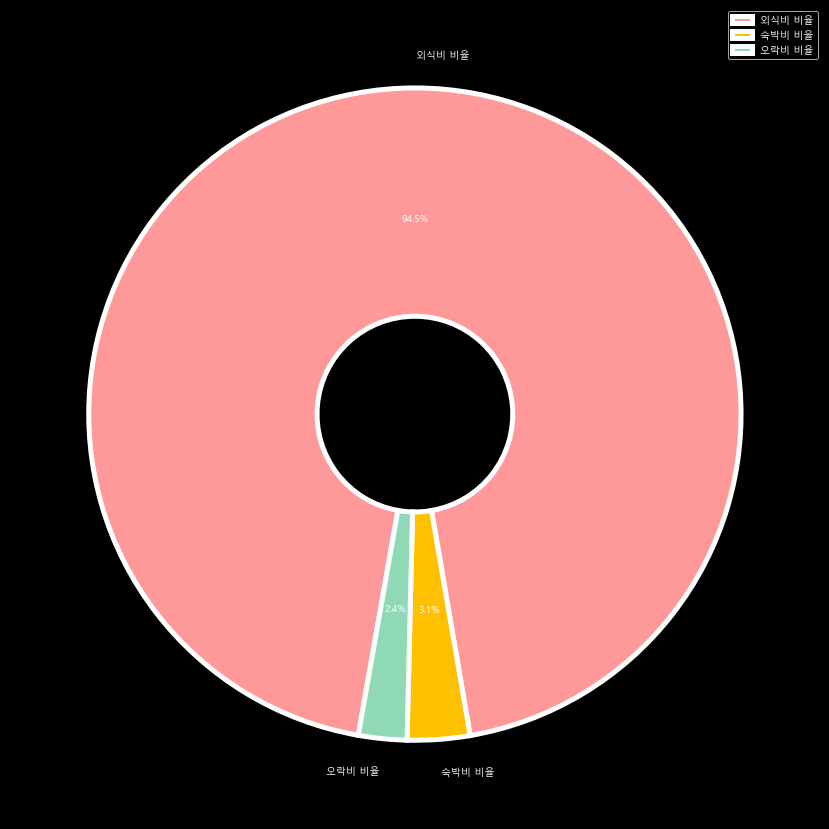

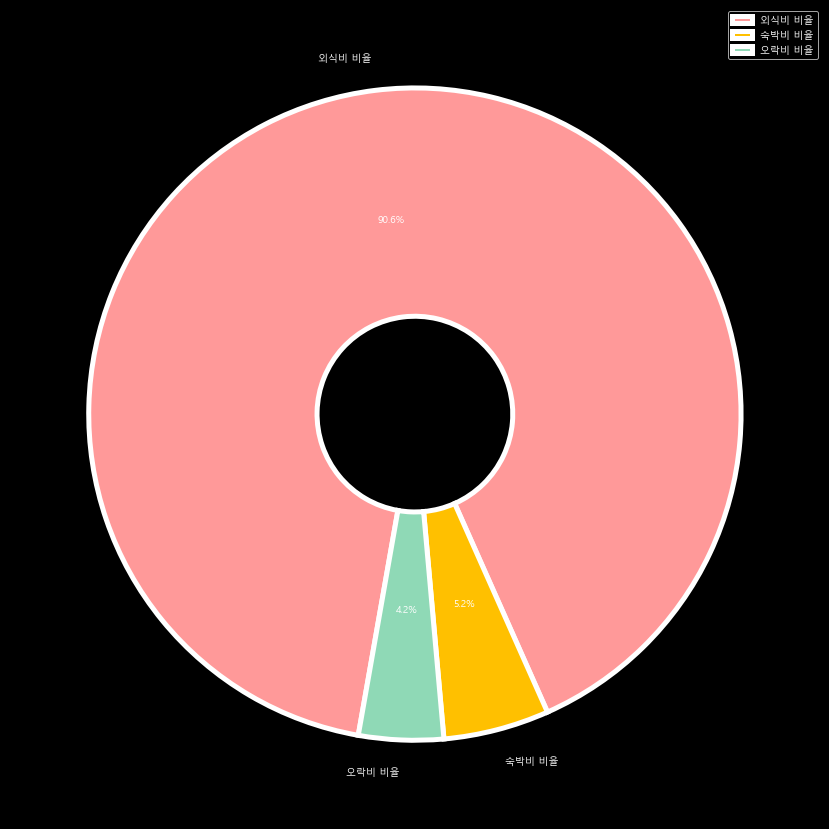

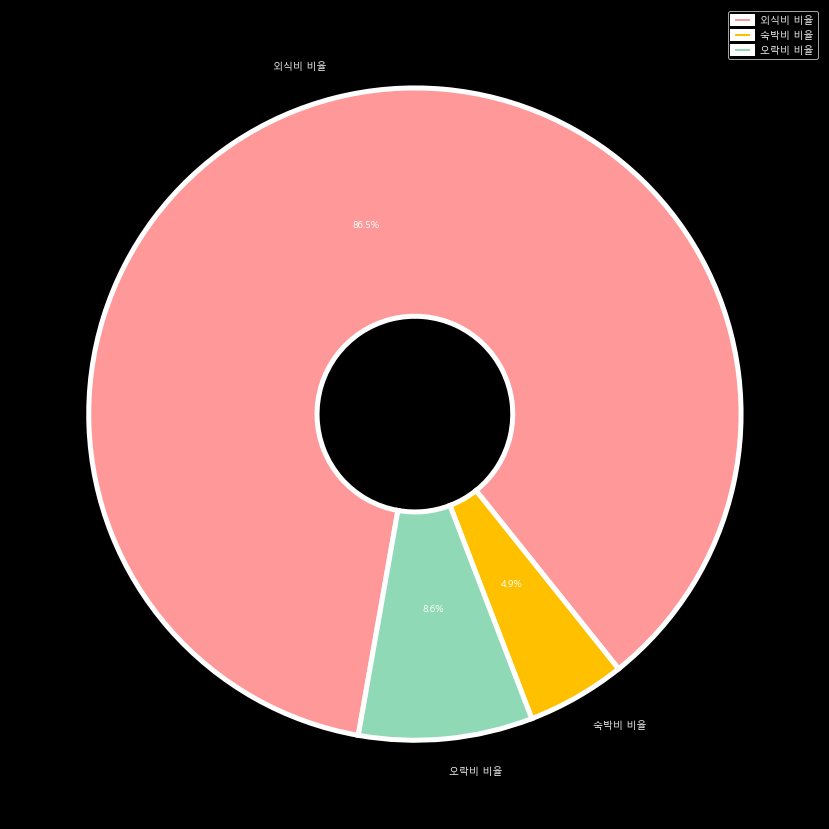

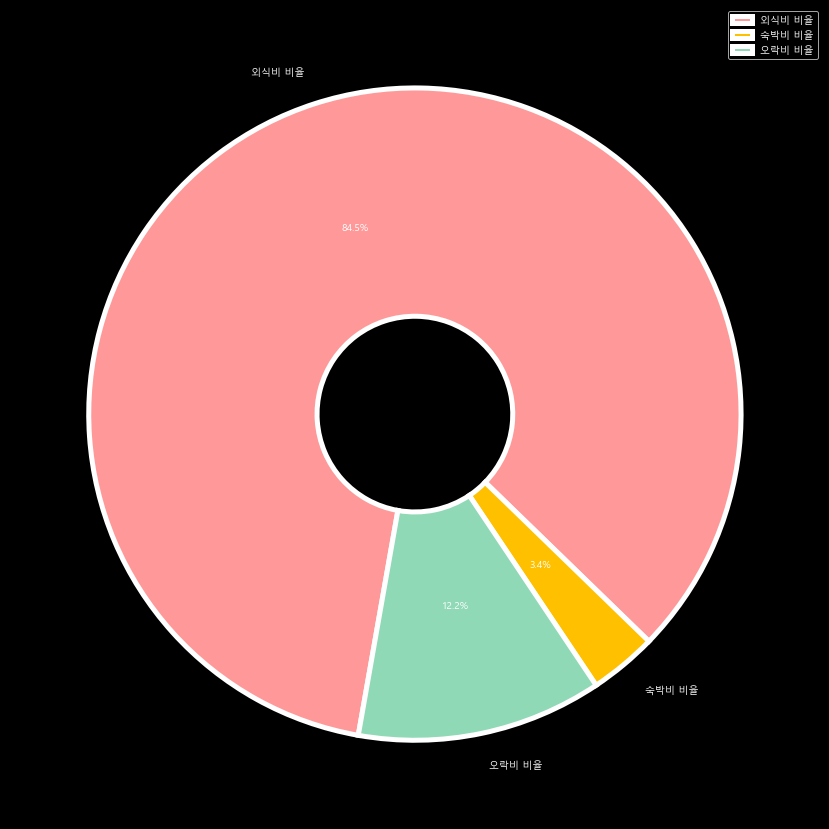

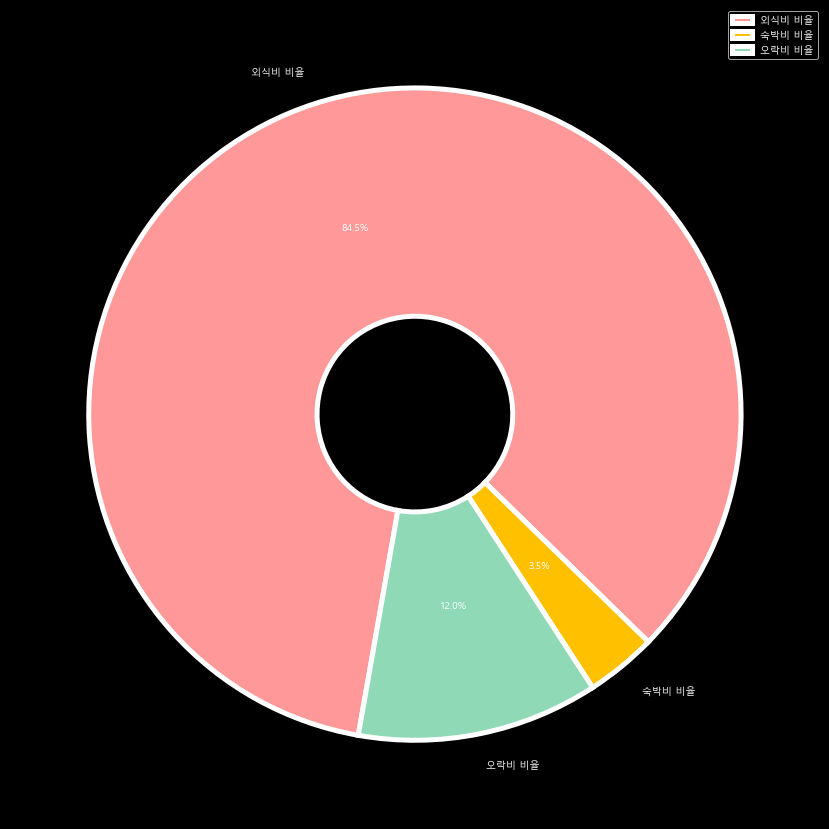

In [39]:
# 20대
# food_ratio, hotel_ratio, leisure_ratio = get_ratio(df, 20)
draw_pit_chart(get_ratio(df, 20),
               ["외식비 비율", "숙박비 비율", "오락비 비율"], "20대")
draw_pit_chart(get_ratio(df, 30),
               ["외식비 비율", "숙박비 비율", "오락비 비율"], "30대")
draw_pit_chart(get_ratio(df, 40),
               ["외식비 비율", "숙박비 비율", "오락비 비율"], "40대")
draw_pit_chart(get_ratio(df, 50),
               ["외식비 비율", "숙박비 비율", "오락비 비율"], "50대")
draw_pit_chart(get_ratio(df, 60),
               ["외식비 비율", "숙박비 비율", "오락비 비율"], "60대")


In [ ]:
# 30대
_30_df = col_by_age(3)
label_array = np.array(["식료품비", "가구/가사용품비", "의류/신발비", "보건의료비",
                       "교양오락비", "교통/통신비", "교육비", "세금", "자가소비액", "기타소비지출"])
ratio_array, ratio_sort_des = get_ratio(_30_df)
draw_pit_chart(list(ratio_array[ratio_sort_des]),
               list(label_array[ratio_sort_des]), "30대")


In [ ]:
# 40대
_40_df = col_by_age(4)
label_array = np.array(["식료품비", "가구/가사용품비", "의류/신발비", "보건의료비",
                       "교양오락비", "교통/통신비", "교육비", "세금", "자가소비액", "기타소비지출"])
ratio_array, ratio_sort_des = get_ratio(_40_df)
draw_pit_chart(list(ratio_array[ratio_sort_des]),
               list(label_array[ratio_sort_des]), "40대")


In [ ]:
# 50대
_50_df = col_by_age(5)
label_array = np.array(["식료품비", "가구/가사용품비", "의류/신발비", "보건의료비",
                       "교양오락비", "교통/통신비", "교육비", "세금", "자가소비액", "기타소비지출"])
ratio_array, ratio_sort_des = get_ratio(_50_df)
draw_pit_chart(list(ratio_array[ratio_sort_des]),
               list(label_array[ratio_sort_des]), "50대")


In [ ]:
# 60대
_60_df = col_by_age(6)
label_array = np.array(["식료품비", "가구/가사용품비", "의류/신발비", "보건의료비",
                       "교양오락비", "교통/통신비", "교육비", "세금", "자가소비액", "기타소비지출"])
ratio_array, ratio_sort_des = get_ratio(_60_df)
draw_pit_chart(list(ratio_array[ratio_sort_des]),
               list(label_array[ratio_sort_des]), "60대")
